<a href="https://colab.research.google.com/github/jucamargo/cesta-basica/blob/main/cesta_basica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Cesta Basica


https://www.dieese.org.br/metodologia/metodologiaCestaBasica.pdf



https://colab.research.google.com/github/nestauk/im-tutorials/blob/3-ysi-tutorial/notebooks/Web-Scraping/Web%20Scraping%20Tutorial.ipynb#scrollTo=wFO6XR13W8l5




![](https://github.com/areias/cesta-basica/blob/main/images/cesta-basica.png?raw=1)


## 1. Carne

### 1.1. Coxão  mole 

Da nota metodologica:

>Devem  ser pesquisados  além  do  coxão  mole  (chã  de  dentro)  mais dois  cortes  de carne bovina,cujos preços sejam semelhantes. Podem ser coxão duro (chã de fora) ou patinho etc..


Aqui screenshot do resultado de pesquisar manualmente "coxão  mole" no site do supermercado Pao de Acucar.

![](https://github.com/areias/cesta-basica/blob/main/images/pao-de-acucar.png?raw=1)

In [ ]:
import requests
from bs4 import BeautifulSoup


In [ ]:
url="https://www.paodeacucar.com/busca?w=cox%C3%A3o%20%20mole&qt=12&p=1&gt=grid"

In [ ]:
# https://stackoverflow.com/questions/1695183/how-to-percent-encode-url-parameters-in-python#1695199
from urllib.parse import quote
quote('coxão mole')


'cox%C3%A3o%20mole'

In [ ]:
response = requests.get(url)

# Parse the whole HTML page using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Title of the parsed page
soup.title

<title>coxão  mole | Pão de Açúcar</title>

Traversar o DOM pode ser bem painful. Depois de muitas tentativas de achar a correta posicao no DOM sem sucesso, olhando com cuidado o response object percebi que tinha formato Json! Que é beeem mais facil de se trabalhar.


![](https://github.com/areias/cesta-basica/blob/main/images/dom-tree.png?raw=1)

In [ ]:
soup.find_all("a", "product-cardstyles__Link-sc-1uwpde0-7 hxEXIy hyperlinkstyles__Link-j02w35-0 dOMnau")

[]

In [ ]:
soup.text


'\n/* sc-component-id: hyperlinkstyles__Link-j02w35-0 */\n.dOMnau{display:inline;margin-bottom:8px;color:#88B04B;font-size:16px;font-weight:null;font-family:openSans;-webkit-text-decoration:none;text-decoration:none;cursor:pointer;} .dOMnau:hover{-webkit-text-decoration:underline;text-decoration:underline;color:#88B04B;}.bMSypr{display:inline;margin-bottom:8px;color:#88B04B;font-size:14px;font-weight:null;font-family:openSans;-webkit-text-decoration:none;text-decoration:none;cursor:pointer;} .bMSypr:hover{-webkit-text-decoration:underline;text-decoration:underline;color:#88B04B;}\n/* sc-component-id: textstyles__TextComponent-w4b5ef-0 */\n.koutsY{font-family:openSans;font-size:14px;text-align:left;font-style:normal;color:#FFFFFF;font-weight:normal;line-height:19px;margin:1em 0px;white-space:normal;text-transform:none;-webkit-text-decoration:none;text-decoration:none;}.dhoqNi{font-family:openSans;font-size:14px;text-align:left;font-style:normal;color:#000000;font-weight:bold;line-height

In [ ]:
import json

In [ ]:
jsn=json.loads(soup.find("html").find("body").find("script").text)

In [ ]:
jsn.keys()

dict_keys(['props', 'page', 'query', 'buildId', 'isFallback', 'customServer', 'gip', 'appGip', 'head'])

In [ ]:
jsn['props'].keys()

dict_keys(['initialProps', 'initialState'])

In [ ]:
jsn['props']['initialProps']['componentProps']['initialParams']

{'customerId': '',
 'filters': {'filters': []},
 'isMultiSearch': False,
 'maxResults': '12',
 'ppc': None,
 'sellType': None,
 'skipResults': 0,
 'sort': None,
 'storeId': 501,
 't': None}

In [ ]:
jsn['props']['initialProps']['componentProps'].keys()

dict_keys(['initialParams', 'initialQueries', 'responseS3', 'searchResponse'])

In [ ]:
jsn['props']['initialProps']['componentProps']['searchResponse'].keys()

dict_keys(['result_meta', 'userid', 'pages', 'manual_click_logging', 'automatic_click_logging', 'facets', 'results', 'productList', 'totalProducts', 'qtyRequestedProducts'])

In [ ]:
jsn['props']['initialProps']['componentProps']['searchResponse']['results']

[{'categorias': ['Bovina'],
  'image_url': 'http://www.paodeacucar.com/img/uploads/1/450/666450x200x200.jpg',
  'instock': '1',
  'mainShelfId': '10070',
  'price': '49,90',
  'rank': 1,
  's_id': 0,
  'shelfList': [],
  'shelfname': 'bovina',
  'sku': '0034838',
  'text': '',
  'title': 'Coxão Mole Bovino Peça Resfriado Bandeja 1kg',
  'url': 'https://www.paodeacucar.com/produto/64376'},
 {'categorias': ['Bovina'],
  'image_url': 'http://www.paodeacucar.com/img/uploads/1/984/471984x200x200.jpg',
  'instock': '1',
  'mainShelfId': '10070',
  'price': '25,17',
  'rank': 2,
  's_id': 0,
  'shelfList': [],
  'shelfname': 'bovina',
  'sku': '0077224',
  'text': 'BIFE <b>COXAO</b> <b>MOLE</b> BOVINO 500G',
  'title': 'Coxão Mole (Chã de Dentro) em Bife Bandeja 500g',
  'url': 'https://www.paodeacucar.com/produto/168491'},
 {'categorias': ['Bovina'],
  'image_url': 'http://www.paodeacucar.com/img/uploads/1/579/511579x200x200.jpg',
  'instock': '1',
  'mainShelfId': '10070',
  'price': '27,20

In [ ]:
len(jsn['props']['initialProps']['componentProps']['searchResponse']['results'])

9

In [ ]:
results=jsn['props']['initialProps']['componentProps']['searchResponse']['results']

In [ ]:
import pandas as pd

In [ ]:
df= pd.DataFrame.from_records(results)

In [ ]:
df

,title,url,text,rank,shelfList,s_id,image_url,price,instock,shelfname,sku,mainShelfId,categorias,brand
0,Coxão Mole Bovino Peça Resfriado Bandeja 1kg,https://www.paodeacucar.com/produto/64376,,1,[],0,http://www.paodeacucar.com/img/uploads/1/450/6...,"49,90",1,bovina,0034838,10070,[Bovina],NaN
1,Coxão Mole (Chã de Dentro) em Bife Bandeja 500g,https://www.paodeacucar.com/produto/168491,BIFE <b>COXAO</b> <b>MOLE</b> BOVINO 500G,2,[],0,http://www.paodeacucar.com/img/uploads/1/984/4...,"25,17",1,bovina,0077224,10070,[Bovina],NaN
2,Coxão Mole para Strogonoff Resfriado Bandeja 400g,https://www.paodeacucar.com/produto/28742,STROGONOFCOXAOMOLE BOVRESF400G,3,[],0,http://www.paodeacucar.com/img/uploads/1/579/5...,"27,20",1,bovina,0082587,10070,[Bovina],NaN
3,Coxão Mole Capa Bovino Resfriado Bandeja 500g,https://www.paodeacucar.com/produto/78629,CAPA <b>COXAO</b> <b>MOLE</b> BOV RESF 500g,4,[],0,http://www.paodeacucar.com/img/uploads/1/928/4...,"24,50",1,bovina,0021890,10070,[Bovina],BASSI
4,Tiras de Strogonoff de Coxão Mole Bovino Resfr...,https://www.paodeacucar.com/produto/185333,STEAK DE,5,[],0,http://www.paodeacucar.com/img/uploads/1/471/6...,"24,39",0,bovina,0611626,10070,[Bovina],NaN
5,Coxão Mole Resfriada Novilho CONFRARIA GOURMET...,https://www.paodeacucar.com/produto/113329,CG <b>COXAO</b> <b>MOLE</b> NOVILHO BIFE 500G,6,[],0,http://www.paodeacucar.com/img/uploads/1/618/6...,"39,99",0,bovina,0465786,10070,[Bovina],CONFRARIA GOURMET
6,Tiras de Coxão Mole Congelado SWIFT 500G,https://www.paodeacucar.com/produto/419262,TIRAS DE <b>COXAO</b> <b>MOLE</b> SWIFT 500G,7,[],0,http://www.paodeacucar.com/img/uploads/1/509/1...,"21,39",0,bovina,1160957,10070,"[Bovina, Swift]",NaN
7,Coxão Mole para Strogonoff Rubia Gallega Quali...,https://www.paodeacucar.com/produto/181580,BUCHO RUBIA BOV NC KG,8,[],0,http://www.paodeacucar.com/img/uploads/1/395/6...,"26,26",0,bovina,0115636,10070,[Bovina],NaN
8,Cubos De Coxão Mole SWIFT 500g,https://www.paodeacucar.com/produto/419193,CUBOS DE <b>COXAO</b> <b>MOLE</b> SWIFT 500G,9,[],0,http://www.paodeacucar.com/img/uploads/1/160/6...,"25,93",0,bovina,7561535,10070,"[Bovina, Swift]",NaN


Agora precisamos extrair do titulo a quantidade da carne! Stackoverflow to the rescue!

https://stackoverflow.com/questions/59202131/regex-to-extract-both-integer-or-float-values-followed-by-a-unit-python

Tambem um otimo recurso para testar teu regex: https://regexr.com/

![](https://github.com/areias/cesta-basica/blob/main/images/regex.png?raw=1)

In [ ]:
import re

In [ ]:
df['produto']="coxao mole"

In [ ]:
txt="Coxão Mole Bovino Peça Resfriado Bandeja 1kg"

In [ ]:
q=re.search("([.\d]+)\s*(?:mg|kg|ml|q.s.|ui|M|g|µg)",txt)

In [ ]:
q

<re.Match object; span=(41, 44), match='1kg'>

In [ ]:
re.search("([.\d]+)",q.group()).group()

'1'

In [ ]:
re.search("(?:mg|kg|ml|q.s.|ui|M|g|µg)",q.group()).group()

'kg'

# Nova seção

In [ ]:
import numpy as np

In [ ]:
def get_quantity(text):
    q = re.search("([.\d]+)\s*(?:mg|kg|ml|q.s.|ui|M|g|µg)",text.lower())
    if q:
        quantity = re.search("([.\d]+)",q.group()).group()
        return int(quantity)
    else:
        return np.nan


In [ ]:
def get_unit(text):
    q = re.search("([.\d]+)\s*(?:mg|kg|ml|q.s.|ui|M|g|µg)",text.lower())
    if q:
        unit = re.search("(?:mg|kg|ml|q.s.|ui|M|g|µg)",q.group()).group()
        return unit
    else:
        return None


In [ ]:
df['quantity']=df['title'].apply(get_quantity)

In [ ]:
df['unit']=df['title'].apply(get_unit)

In [ ]:
from datetime import date

In [ ]:
df['date_scraped']=date.today()

In [ ]:
df

,title,url,text,rank,shelfList,s_id,image_url,price,instock,shelfname,sku,mainShelfId,categorias,brand,produto,quantity,unit,date_scraped
0,Coxão Mole Bovino Peça Resfriado Bandeja 1kg,https://www.paodeacucar.com/produto/64376,,1,[],0,http://www.paodeacucar.com/img/uploads/1/450/6...,"49,90",1,bovina,0034838,10070,[Bovina],NaN,coxao mole,1,kg,2021-05-30
1,Coxão Mole (Chã de Dentro) em Bife Bandeja 500g,https://www.paodeacucar.com/produto/168491,BIFE <b>COXAO</b> <b>MOLE</b> BOVINO 500G,2,[],0,http://www.paodeacucar.com/img/uploads/1/984/4...,"25,17",1,bovina,0077224,10070,[Bovina],NaN,coxao mole,500,g,2021-05-30
2,Coxão Mole para Strogonoff Resfriado Bandeja 400g,https://www.paodeacucar.com/produto/28742,STROGONOFCOXAOMOLE BOVRESF400G,3,[],0,http://www.paodeacucar.com/img/uploads/1/579/5...,"27,20",1,bovina,0082587,10070,[Bovina],NaN,coxao mole,400,g,2021-05-30
3,Coxão Mole Capa Bovino Resfriado Bandeja 500g,https://www.paodeacucar.com/produto/78629,CAPA <b>COXAO</b> <b>MOLE</b> BOV RESF 500g,4,[],0,http://www.paodeacucar.com/img/uploads/1/928/4...,"24,50",1,bovina,0021890,10070,[Bovina],BASSI,coxao mole,500,g,2021-05-30
4,Tiras de Strogonoff de Coxão Mole Bovino Resfr...,https://www.paodeacucar.com/produto/185333,STEAK DE,5,[],0,http://www.paodeacucar.com/img/uploads/1/471/6...,"24,39",0,bovina,0611626,10070,[Bovina],NaN,coxao mole,400,g,2021-05-30
5,Coxão Mole Resfriada Novilho CONFRARIA GOURMET...,https://www.paodeacucar.com/produto/113329,CG <b>COXAO</b> <b>MOLE</b> NOVILHO BIFE 500G,6,[],0,http://www.paodeacucar.com/img/uploads/1/618/6...,"39,99",0,bovina,0465786,10070,[Bovina],CONFRARIA GOURMET,coxao mole,500,g,2021-05-30
6,Tiras de Coxão Mole Congelado SWIFT 500G,https://www.paodeacucar.com/produto/419262,TIRAS DE <b>COXAO</b> <b>MOLE</b> SWIFT 500G,7,[],0,http://www.paodeacucar.com/img/uploads/1/509/1...,"21,39",0,bovina,1160957,10070,"[Bovina, Swift]",NaN,coxao mole,500,g,2021-05-30
7,Coxão Mole para Strogonoff Rubia Gallega Quali...,https://www.paodeacucar.com/produto/181580,BUCHO RUBIA BOV NC KG,8,[],0,http://www.paodeacucar.com/img/uploads/1/395/6...,"26,26",0,bovina,0115636,10070,[Bovina],NaN,coxao mole,400,g,2021-05-30
8,Cubos De Coxão Mole SWIFT 500g,https://www.paodeacucar.com/produto/419193,CUBOS DE <b>COXAO</b> <b>MOLE</b> SWIFT 500G,9,[],0,http://www.paodeacucar.com/img/uploads/1/160/6...,"25,93",0,bovina,7561535,10070,"[Bovina, Swift]",NaN,coxao mole,500,g,2021-05-30


In [ ]:
# normalizar a kilos
df['kg']=np.where(df['unit']=="g",df['quantity']/1000,df['quantity'])

In [ ]:
df.loc[:,'price']=df.loc[:,'price'].apply(lambda x: float(x.replace(",",".")))

In [ ]:
df['price_per_kg']=df['price']/df['kg']

In [ ]:
df

,title,url,text,rank,shelfList,s_id,image_url,price,instock,shelfname,sku,mainShelfId,categorias,brand,produto,quantity,unit,date_scraped,kg,price_per_kg
0,Coxão Mole Bovino Peça Resfriado Bandeja 1kg,https://www.paodeacucar.com/produto/64376,,1,[],0,http://www.paodeacucar.com/img/uploads/1/450/6...,49.90,1,bovina,0034838,10070,[Bovina],NaN,coxao mole,1,kg,2021-05-30,1.0,49.900
1,Coxão Mole (Chã de Dentro) em Bife Bandeja 500g,https://www.paodeacucar.com/produto/168491,BIFE <b>COXAO</b> <b>MOLE</b> BOVINO 500G,2,[],0,http://www.paodeacucar.com/img/uploads/1/984/4...,25.17,1,bovina,0077224,10070,[Bovina],NaN,coxao mole,500,g,2021-05-30,0.5,50.340
2,Coxão Mole para Strogonoff Resfriado Bandeja 400g,https://www.paodeacucar.com/produto/28742,STROGONOFCOXAOMOLE BOVRESF400G,3,[],0,http://www.paodeacucar.com/img/uploads/1/579/5...,27.20,1,bovina,0082587,10070,[Bovina],NaN,coxao mole,400,g,2021-05-30,0.4,68.000
3,Coxão Mole Capa Bovino Resfriado Bandeja 500g,https://www.paodeacucar.com/produto/78629,CAPA <b>COXAO</b> <b>MOLE</b> BOV RESF 500g,4,[],0,http://www.paodeacucar.com/img/uploads/1/928/4...,24.50,1,bovina,0021890,10070,[Bovina],BASSI,coxao mole,500,g,2021-05-30,0.5,49.000
4,Tiras de Strogonoff de Coxão Mole Bovino Resfr...,https://www.paodeacucar.com/produto/185333,STEAK DE,5,[],0,http://www.paodeacucar.com/img/uploads/1/471/6...,24.39,0,bovina,0611626,10070,[Bovina],NaN,coxao mole,400,g,2021-05-30,0.4,60.975
5,Coxão Mole Resfriada Novilho CONFRARIA GOURMET...,https://www.paodeacucar.com/produto/113329,CG <b>COXAO</b> <b>MOLE</b> NOVILHO BIFE 500G,6,[],0,http://www.paodeacucar.com/img/uploads/1/618/6...,39.99,0,bovina,0465786,10070,[Bovina],CONFRARIA GOURMET,coxao mole,500,g,2021-05-30,0.5,79.980
6,Tiras de Coxão Mole Congelado SWIFT 500G,https://www.paodeacucar.com/produto/419262,TIRAS DE <b>COXAO</b> <b>MOLE</b> SWIFT 500G,7,[],0,http://www.paodeacucar.com/img/uploads/1/509/1...,21.39,0,bovina,1160957,10070,"[Bovina, Swift]",NaN,coxao mole,500,g,2021-05-30,0.5,42.780
7,Coxão Mole para Strogonoff Rubia Gallega Quali...,https://www.paodeacucar.com/produto/181580,BUCHO RUBIA BOV NC KG,8,[],0,http://www.paodeacucar.com/img/uploads/1/395/6...,26.26,0,bovina,0115636,10070,[Bovina],NaN,coxao mole,400,g,2021-05-30,0.4,65.650
8,Cubos De Coxão Mole SWIFT 500g,https://www.paodeacucar.com/produto/419193,CUBOS DE <b>COXAO</b> <b>MOLE</b> SWIFT 500G,9,[],0,http://www.paodeacucar.com/img/uploads/1/160/6...,25.93,0,bovina,7561535,10070,"[Bovina, Swift]",NaN,coxao mole,500,g,2021-05-30,0.5,51.860


In [ ]:
df['price_per_kg'].mean()

57.60944444444445

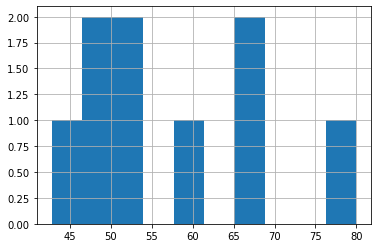

In [ ]:
df['price_per_kg'].hist()

### 1.2. Patinho

Aqui ja vamos a repetir muito do codigo de cima, simplesmente vai mudar o produto. Por isso ja podemos criar funcoes para reutilizar.

In [ ]:
def get_results(produto):

    url="https://www.paodeacucar.com/busca?w="+quote(produto)+"&qt=12&p=1&gt=grid"

    response = requests.get(url)

    # Parse the whole HTML page using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    jsn=json.loads(soup.find("html").find("body").find("script").text)

    return jsn['props']['initialProps']['componentProps']['searchResponse']['results']

In [ ]:
df2=pd.DataFrame.from_records(get_results("patinho"))

In [ ]:
# use shelfname "bovina" to discriminate between meat and other products
df2['produto']="patinho"

In [ ]:
df2['quantity']=df2['title'].apply(lambda x: get_quantity(x))

In [ ]:
df2['unit']=df2['title'].apply(lambda x: get_unit(x))

In [ ]:
df2

,title,url,text,rank,shelfList,s_id,image_url,price,instock,shelfname,sku,mainShelfId,categorias,produto,quantity,unit
0,Bife de Patinho Bovino Resfriado Bandeja 500g,https://www.paodeacucar.com/produto/168038,<b>PATINHO</b> BOV RESF BIFE 500G,1,[],0,http://www.paodeacucar.com/img/uploads/1/27/50...,"22,78",1,bovina,0077392,10070,[Bovina],patinho,500.0,g
1,Carne Bovina Moída De Patinho Resfriada QUALIT...,https://www.paodeacucar.com/produto/430796,MOIDA DE <b>PATINHO</b> BM RESF 500GR,2,[],0,http://www.paodeacucar.com/img/uploads/1/768/6...,"31,49",1,bovina,7600173,10070,[Bovina],patinho,500.0,g
2,Tiras De Patinho SWIFT 500g,https://www.paodeacucar.com/produto/419281,TIRAS DE <b>PATINHO</b> SWIFT 500G,3,[],0,http://www.paodeacucar.com/img/uploads/1/236/1...,"21,96",1,bovina,1160953,10070,"[Bovina, Swift]",patinho,500.0,g
3,Patinho Bovino Resfriado 1kg,https://www.paodeacucar.com/produto/134682,<b>PATINHO</b> PECA BOV RESF KG,4,[],0,http://www.paodeacucar.com/img/uploads/1/902/6...,"51,83",1,bovina,0040129,10070,[Bovina],patinho,1.0,kg
4,Carne Moída de Patinho Congelado SWIFT 500G,https://www.paodeacucar.com/produto/419269,CARNE MOIDA DE <b>PATINHO</b> SWIFT 500G,5,[],0,http://www.paodeacucar.com/img/uploads/1/740/5...,"23,39",1,bovina,1160931,10070,"[Bovina, Swift]",patinho,500.0,g
5,Carne Moída De Patinho SWIFT Congelada 900g,https://www.paodeacucar.com/produto/452729,CARNE MOIDA DE <b>PATINHO</b> SWIFT 900G,6,[],0,http://www.paodeacucar.com/img/uploads/1/983/1...,"41,49",1,bovina,1192071,10070,[Bovina],patinho,900.0,g
6,Bife de Patinho Milanesa Congelado SWIFT 900G,https://www.paodeacucar.com/produto/419290,BIFE DE <b>PATINHO</b> MILANESA SWIFT 900G,7,[],0,http://www.paodeacucar.com/img/uploads/1/737/5...,"41,49",1,bovina,1160935,10070,"[Bovina, Swift]",patinho,900.0,g
7,Carne Moída Light de Patinho 240g,https://www.paodeacucar.com/produto/594119,"Feita com <b>patinho,</b> a carne moída light ...",8,[],0,http://www.paodeacucar.com/img/uploads/1/642/1...,"15,29",1,bovina,100111981,10070,[Bovina],patinho,240.0,g
8,Mordedor Penduradinhos - Patinho - Toyster,https://www.paodeacucar.com/produto/481871,Esse divertido mordedor ajuda a diminuir a irr...,9,[],0,http://www.paodeacucar.com/img/uploads/1/795/2...,"74,99",1,acessórios,100001457,10329,[Acessórios],patinho,NaN,None
9,Patinho Didático Brinquedos para Bebês - Pica Pau,https://www.paodeacucar.com/produto/542741,<b>Patinho</b> Didático Brinquedos para Bebês ...,10,[],0,http://www.paodeacucar.com/img/uploads/1/903/1...,"29,90",1,artes-e-atividades,100063203,10479,[Artes e atividades],patinho,NaN,None


In [ ]:
df2=df2[df2['shelfname']=="bovina"].copy()

In [ ]:
df2['date_scraped']=date.today()

In [ ]:
def get_price_per_kilo(df):
    df['kg']=np.where(df['unit']=="g",df['quantity']/1000,df['quantity'])
    df.loc[:,'price']=df.loc[:,'price'].apply(lambda x: float(x.replace(",",".")))
    df['price_per_kg']=df['price']/df['kg']
    return df

In [ ]:
df2=get_price_per_kilo(df2)

In [ ]:
df2

,title,url,text,rank,shelfList,s_id,image_url,price,instock,shelfname,sku,mainShelfId,categorias,produto,quantity,unit,date_scraped,kg,price_per_kg
0,Bife de Patinho Bovino Resfriado Bandeja 500g,https://www.paodeacucar.com/produto/168038,<b>PATINHO</b> BOV RESF BIFE 500G,1,[],0,http://www.paodeacucar.com/img/uploads/1/27/50...,22.78,1,bovina,0077392,10070,[Bovina],patinho,500.0,g,2021-05-30,0.50,45.560000
1,Carne Bovina Moída De Patinho Resfriada QUALIT...,https://www.paodeacucar.com/produto/430796,MOIDA DE <b>PATINHO</b> BM RESF 500GR,2,[],0,http://www.paodeacucar.com/img/uploads/1/768/6...,31.49,1,bovina,7600173,10070,[Bovina],patinho,500.0,g,2021-05-30,0.50,62.980000
2,Tiras De Patinho SWIFT 500g,https://www.paodeacucar.com/produto/419281,TIRAS DE <b>PATINHO</b> SWIFT 500G,3,[],0,http://www.paodeacucar.com/img/uploads/1/236/1...,21.96,1,bovina,1160953,10070,"[Bovina, Swift]",patinho,500.0,g,2021-05-30,0.50,43.920000
3,Patinho Bovino Resfriado 1kg,https://www.paodeacucar.com/produto/134682,<b>PATINHO</b> PECA BOV RESF KG,4,[],0,http://www.paodeacucar.com/img/uploads/1/902/6...,51.83,1,bovina,0040129,10070,[Bovina],patinho,1.0,kg,2021-05-30,1.00,51.830000
4,Carne Moída de Patinho Congelado SWIFT 500G,https://www.paodeacucar.com/produto/419269,CARNE MOIDA DE <b>PATINHO</b> SWIFT 500G,5,[],0,http://www.paodeacucar.com/img/uploads/1/740/5...,23.39,1,bovina,1160931,10070,"[Bovina, Swift]",patinho,500.0,g,2021-05-30,0.50,46.780000
5,Carne Moída De Patinho SWIFT Congelada 900g,https://www.paodeacucar.com/produto/452729,CARNE MOIDA DE <b>PATINHO</b> SWIFT 900G,6,[],0,http://www.paodeacucar.com/img/uploads/1/983/1...,41.49,1,bovina,1192071,10070,[Bovina],patinho,900.0,g,2021-05-30,0.90,46.100000
6,Bife de Patinho Milanesa Congelado SWIFT 900G,https://www.paodeacucar.com/produto/419290,BIFE DE <b>PATINHO</b> MILANESA SWIFT 900G,7,[],0,http://www.paodeacucar.com/img/uploads/1/737/5...,41.49,1,bovina,1160935,10070,"[Bovina, Swift]",patinho,900.0,g,2021-05-30,0.90,46.100000
7,Carne Moída Light de Patinho 240g,https://www.paodeacucar.com/produto/594119,"Feita com <b>patinho,</b> a carne moída light ...",8,[],0,http://www.paodeacucar.com/img/uploads/1/642/1...,15.29,1,bovina,100111981,10070,[Bovina],patinho,240.0,g,2021-05-30,0.24,63.708333


In [ ]:
df2['price_per_kg'].mean()

50.87229166666666

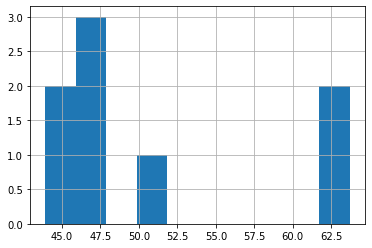

In [ ]:
df2['price_per_kg'].hist()

In [ ]:
df=df.append(df2)

In [ ]:
len(df)

17

In [ ]:
df.produto.value_counts()

coxao mole    9
patinho       8
Name: produto, dtype: int64

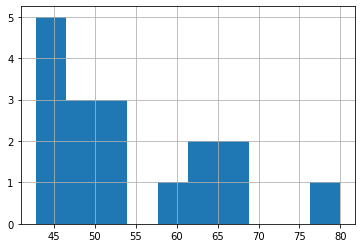

In [ ]:
df['price_per_kg'].hist()

In [ ]:
df.to_csv("data/cesta-basica.csv",index=False)

In [ ]:
jc